## Additional Visualizations

#### Supplementary doc.
With the venue recommendations , it is good to have same additional visualizations of the data we have collected.
Since we are dealing with categorical data, this information collected are best understood via visualization.

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# Use the inline backend to generate the plots within the browser
%matplotlib inline 

import seaborn as sns
sns.set_style("darkgrid")

#If Need to re-download some files saved earlier//or scrape again. 
import requests # library to handle requests
import lxml.html as lh
import bs4 as bs
import urllib.request

from IPython.display import HTML
import base64

print('Libraries imported.')

Libraries imported.


#### Restore Our Data
* Restore Singapore Food Venue Data Frame
* Restore Segmented Town Cluster Data

In [2]:
# Restore dataframe collection : 
sg_food_csv  = r'https://raw.githubusercontent.com/crismag/Coursera_Capstone/master/saved_data/singapore_food_venues.600Scores.Category.csv'
venue_columns = ['Town','Town Latitude','Town Longitude','VenueID','VenueName','score','category','catID','latitude','longitude']
singapore_food_venues      = pd.read_csv(sg_food_csv, usecols=venue_columns, encoding = "ISO-8859-1")

# Eliminate possible venue duplicates.
singapore_town_venues = singapore_food_venues[venue_columns]
# Drop rows with score == 0
singapore_town_venues = singapore_town_venues[singapore_town_venues.score > 0.0]
# Drop rows with missing elements
singapore_town_venues = singapore_town_venues.dropna(axis='columns')

singapore_food_venues.head()

,Town,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
0,ANG MO KIO,1.369972,103.849588,538ef3d5498e088ff4b1e8ba,Koi Café Express,0.0,Bubble Tea Shops,52e81612bcbc57f1066b7a0c,1.369342,103.849820
1,ANG MO KIO,1.369972,103.849588,4d397d4a1fc36dcbe8815bf5,BBQ Express,0.0,BBQ Joints,4bf58dd8d48988d1df931735,1.369239,103.849215
2,ANG MO KIO,1.369972,103.849588,50138eaee4b05d9dc80ae5b0,Hong Kong Sheng Kee Dessert ??????,5.8,Dessert Shops,4bf58dd8d48988d1d0941735,1.369473,103.849241
3,ANG MO KIO,1.369972,103.849588,4ba1b90df964a52094c937e3,Shihlin Taiwan Street Snacks,0.0,Snack Places,4bf58dd8d48988d1c7941735,1.369309,103.849261
4,ANG MO KIO,1.369972,103.849588,5be2d3831af8520039a38da2,Malaysia Boleh!,7.5,Food Courts,4bf58dd8d48988d120951735,1.369669,103.848900


#### Check Venue Counts

In [3]:
venue_counts = singapore_town_venues.groupby('Town').count()
venue_counts

,Town Latitude,Town Longitude,VenueID,VenueName,score,category,catID,latitude,longitude
Town,,,,,,,,,
ANG MO KIO,34,34,34,34,34,34,34,34,34
BEDOK,29,29,29,29,29,29,29,29,29
BISHAN,36,36,36,36,36,36,36,36,36
BUKIT BATOK,22,22,22,22,22,22,22,22,22
BUKIT MERAH,9,9,9,9,9,9,9,9,9
BUKIT PANJANG,15,15,15,15,15,15,15,15,15
CENTRAL,46,46,46,46,46,46,46,46,46
CHOA CHU KANG,27,27,27,27,27,27,27,27,27
CLEMENTI,34,34,34,34,34,34,34,34,34


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Check how it looks like on scatter plot.

Text(0.5,1,'Scatter Plot of Top venues in "Town Latitude" and Score')

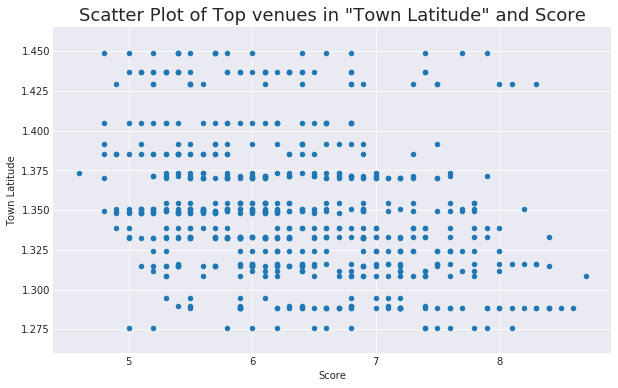

In [5]:
singapore_town_venues.plot.scatter('score', 'Town Latitude', figsize=(10,6))
#singapore_town_venues.plot.scatter('score', 'latitude', figsize=(10,6))

plt.xlabel('Score')
plt.ylabel('Town Latitude')
plt.title('Scatter Plot of Top venues in "Town Latitude" and Score', loc='center', fontsize=18)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


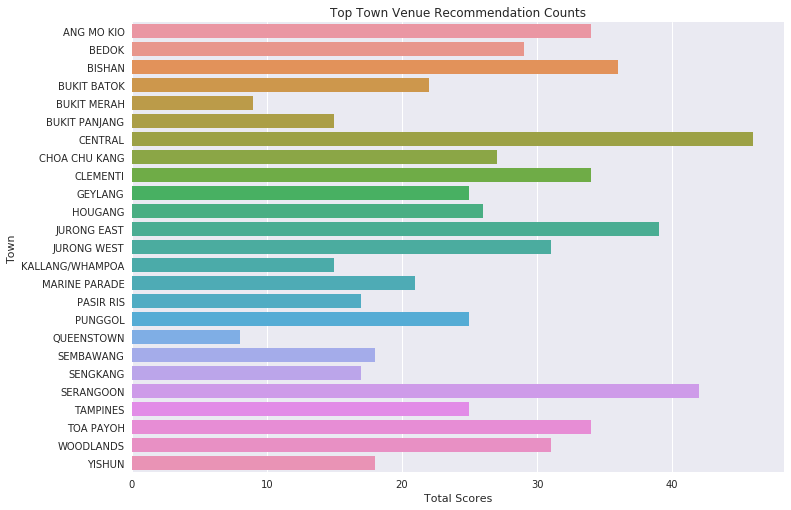

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax0 = sns.barplot(data = venue_counts.reset_index(), x = 'score', y = 'Town')
ax0.set_title("Top Town Venue Recommendation Counts")
ax0.set_xlabel('Total Scores')
plt.show()

#### Top 10 most common venue type

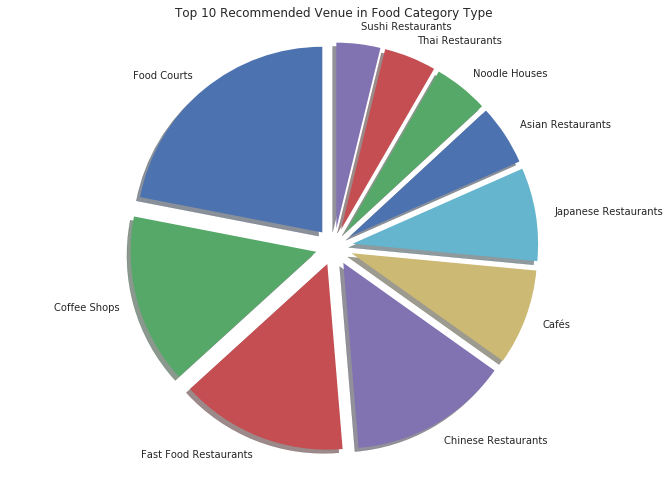

,category,VenueName
0,Food Courts,92
1,Coffee Shops,62
2,Fast Food Restaurants,61
3,Chinese Restaurants,58
4,Cafés,35
5,Japanese Restaurants,34
6,Asian Restaurants,22
7,Noodle Houses,20
8,Thai Restaurants,19
9,Sushi Restaurants,16


In [7]:
top_10_venue = singapore_town_venues.groupby('category')['VenueName'].count().sort_values(ascending=False)[:10].reset_index()
labels = top_10_venue['category']
sizes  = top_10_venue['VenueName']
explode = [.1] * 10
# Plot
plt.title("Top 10 Recommended Venue in Food Category Type")
ax1 = plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=90)
plt.axis('equal')
plt.show()
top_10_venue

#### Top 20 venues given with highest score rating

In [8]:
# Top 20 venues with highest given score rating
top_20_scorer = singapore_town_venues.groupby(['Town','category'])['score'].mean().sort_values(ascending=False)[:20].reset_index()
top_20_scorer

,Town,category,score
0,MARINE PARADE,Food Courts,8.70
1,CENTRAL,Asian Restaurants,8.50
2,CENTRAL,Seafood Restaurants,8.35
3,YISHUN,Noodle Houses,8.30
4,CENTRAL,Udon Restaurants,8.30
5,GEYLANG,BBQ Joints,8.30
6,CENTRAL,Breweries,8.20
7,CENTRAL,Dumpling Restaurants,8.10
8,YISHUN,Bubble Tea Shops,8.10
9,YISHUN,Chinese Restaurants,8.00


In [9]:
sg_top_clusters = r'https://raw.githubusercontent.com/crismag/Coursera_Capstone/master/saved_data/sg_top_clusters.csv'
sg_town_clusters = pd.read_csv(sg_top_clusters)
sg_town_clusters.head()

,Town,median_rent,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ANG MO KIO,2033.333333,1.369972,103.849588,1,Food Courts,Fast Food Restaurants,Dessert Shops,Japanese Restaurants,Sushi Restaurants,Cafés,Ramen Restaurants,Hong Kong Restaurants,Halal Restaurants,Miscellaneous Shops
1,BEDOK,2087.500000,1.324011,103.930172,3,Coffee Shops,Food Courts,Sushi Restaurants,Japanese Restaurants,Fast Food Restaurants,Wings Joints,Fried Chicken Joints,Indian Restaurants,Ice Cream Shops,Hotpot Restaurants
2,BISHAN,2233.333333,1.351042,103.849930,3,Coffee Shops,Japanese Restaurants,Chinese Restaurants,Fast Food Restaurants,Food Courts,Cafés,Bubble Tea Shops,American Restaurants,Portuguese Restaurants,Dumpling Restaurants
3,BUKIT BATOK,1962.500000,1.348506,103.749222,1,Food Courts,Coffee Shops,Fast Food Restaurants,Chinese Restaurants,Asian Restaurants,Thai Restaurants,Pizza Places,Ice Cream Shops,Japanese Restaurants,Sandwich Places
4,BUKIT MERAH,2162.500000,1.289642,103.816798,2,Chinese Restaurants,Coffee Shops,Food Courts,Bistros,Cafés,Dongbei Restaurants,Comfort Food Restaurants,Dessert Shops,Dim Sum Restaurants,Diners


In [10]:
rent_cluster_df = sg_town_clusters[['Town','median_rent','Cluster Labels']].copy()
rent_cluster_df

,Town,median_rent,Cluster Labels
0,ANG MO KIO,2033.333333,1
1,BEDOK,2087.500000,3
2,BISHAN,2233.333333,3
3,BUKIT BATOK,1962.500000,1
4,BUKIT MERAH,2162.500000,2
5,BUKIT PANJANG,1737.500000,4
6,CENTRAL,2450.000000,3
7,CHOA CHU KANG,1933.333333,1
8,CLEMENTI,2263.333333,1
9,GEYLANG,2166.666667,4


In [11]:
# The code was removed by Watson Studio for sharing.

In [12]:
# The code was removed by Watson Studio for sharing.